In [1]:
'''import my libraries '''
import numpy as np
import pandas as pd     
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import confusion_matrix
from matplotlib import pyplot as plt
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier

In [2]:
'''load my data for processing and analysis'''
data = pd.read_csv("../input/sonar-data/sonar data.csv",header=None)
data.head() 

,0,1,2,3,4,5,6,7,8,9,...,51,52,53,54,55,56,57,58,59,60
0,0.0200,0.0371,0.0428,0.0207,0.0954,0.0986,0.1539,0.1601,0.3109,0.2111,...,0.0027,0.0065,0.0159,0.0072,0.0167,0.0180,0.0084,0.0090,0.0032,R
1,0.0453,0.0523,0.0843,0.0689,0.1183,0.2583,0.2156,0.3481,0.3337,0.2872,...,0.0084,0.0089,0.0048,0.0094,0.0191,0.0140,0.0049,0.0052,0.0044,R
2,0.0262,0.0582,0.1099,0.1083,0.0974,0.2280,0.2431,0.3771,0.5598,0.6194,...,0.0232,0.0166,0.0095,0.0180,0.0244,0.0316,0.0164,0.0095,0.0078,R
3,0.0100,0.0171,0.0623,0.0205,0.0205,0.0368,0.1098,0.1276,0.0598,0.1264,...,0.0121,0.0036,0.0150,0.0085,0.0073,0.0050,0.0044,0.0040,0.0117,R
4,0.0762,0.0666,0.0481,0.0394,0.0590,0.0649,0.1209,0.2467,0.3564,0.4459,...,0.0031,0.0054,0.0105,0.0110,0.0015,0.0072,0.0048,0.0107,0.0094,R


*We have catigorical data on y*

In [3]:
encoder = LabelEncoder()
data[60] = encoder.fit_transform(data[60])
data.head()

,0,1,2,3,4,5,6,7,8,9,...,51,52,53,54,55,56,57,58,59,60
0,0.0200,0.0371,0.0428,0.0207,0.0954,0.0986,0.1539,0.1601,0.3109,0.2111,...,0.0027,0.0065,0.0159,0.0072,0.0167,0.0180,0.0084,0.0090,0.0032,1
1,0.0453,0.0523,0.0843,0.0689,0.1183,0.2583,0.2156,0.3481,0.3337,0.2872,...,0.0084,0.0089,0.0048,0.0094,0.0191,0.0140,0.0049,0.0052,0.0044,1
2,0.0262,0.0582,0.1099,0.1083,0.0974,0.2280,0.2431,0.3771,0.5598,0.6194,...,0.0232,0.0166,0.0095,0.0180,0.0244,0.0316,0.0164,0.0095,0.0078,1
3,0.0100,0.0171,0.0623,0.0205,0.0205,0.0368,0.1098,0.1276,0.0598,0.1264,...,0.0121,0.0036,0.0150,0.0085,0.0073,0.0050,0.0044,0.0040,0.0117,1
4,0.0762,0.0666,0.0481,0.0394,0.0590,0.0649,0.1209,0.2467,0.3564,0.4459,...,0.0031,0.0054,0.0105,0.0110,0.0015,0.0072,0.0048,0.0107,0.0094,1


*locking for missing values to clean*

In [4]:
data.info()  # so we don't have missing values

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 208 entries, 0 to 207
Data columns (total 61 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       208 non-null    float64
 1   1       208 non-null    float64
 2   2       208 non-null    float64
 3   3       208 non-null    float64
 4   4       208 non-null    float64
 5   5       208 non-null    float64
 6   6       208 non-null    float64
 7   7       208 non-null    float64
 8   8       208 non-null    float64
 9   9       208 non-null    float64
 10  10      208 non-null    float64
 11  11      208 non-null    float64
 12  12      208 non-null    float64
 13  13      208 non-null    float64
 14  14      208 non-null    float64
 15  15      208 non-null    float64
 16  16      208 non-null    float64
 17  17      208 non-null    float64
 18  18      208 non-null    float64
 19  19      208 non-null    float64
 20  20      208 non-null    float64
 21  21      208 non-null    float64
 22  22

In [5]:
data.describe()

,0,1,2,3,4,5,6,7,8,9,...,51,52,53,54,55,56,57,58,59,60
count,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,...,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000
mean,0.029164,0.038437,0.043832,0.053892,0.075202,0.104570,0.121747,0.134799,0.178003,0.208259,...,0.013420,0.010709,0.010941,0.009290,0.008222,0.007820,0.007949,0.007941,0.006507,0.466346
std,0.022991,0.032960,0.038428,0.046528,0.055552,0.059105,0.061788,0.085152,0.118387,0.134416,...,0.009634,0.007060,0.007301,0.007088,0.005736,0.005785,0.006470,0.006181,0.005031,0.500070
min,0.001500,0.000600,0.001500,0.005800,0.006700,0.010200,0.003300,0.005500,0.007500,0.011300,...,0.000800,0.000500,0.001000,0.000600,0.000400,0.000300,0.000300,0.000100,0.000600,0.000000
25%,0.013350,0.016450,0.018950,0.024375,0.038050,0.067025,0.080900,0.080425,0.097025,0.111275,...,0.007275,0.005075,0.005375,0.004150,0.004400,0.003700,0.003600,0.003675,0.003100,0.000000
50%,0.022800,0.030800,0.034300,0.044050,0.062500,0.092150,0.106950,0.112100,0.152250,0.182400,...,0.011400,0.009550,0.009300,0.007500,0.006850,0.005950,0.005800,0.006400,0.005300,0.000000
75%,0.035550,0.047950,0.057950,0.064500,0.100275,0.134125,0.154000,0.169600,0.233425,0.268700,...,0.016725,0.014900,0.014500,0.012100,0.010575,0.010425,0.010350,0.010325,0.008525,1.000000
max,0.137100,0.233900,0.305900,0.426400,0.401000,0.382300,0.372900,0.459000,0.682800,0.710600,...,0.070900,0.039000,0.035200,0.044700,0.039400,0.035500,0.044000,0.036400,0.043900,1.000000


In [6]:
data[60].value_counts()

0    111
1     97
Name: 60, dtype: int64

*then correlation coefficients between variables*

In [7]:
conv = data.corr()
conv

,0,1,2,3,4,5,6,7,8,9,...,51,52,53,54,55,56,57,58,59,60
0,1.000000,0.735896,0.571537,0.491438,0.344797,0.238921,0.260815,0.355523,0.353420,0.318276,...,0.355299,0.311729,0.322299,0.312067,0.220642,0.313725,0.368132,0.357116,0.347078,-0.271694
1,0.735896,1.000000,0.779916,0.606684,0.419669,0.332329,0.279040,0.334615,0.316733,0.270782,...,0.434548,0.346076,0.383960,0.380165,0.262263,0.280341,0.353042,0.352200,0.358761,-0.231238
2,0.571537,0.779916,1.000000,0.781786,0.546141,0.346275,0.190434,0.237884,0.252691,0.219637,...,0.394076,0.332914,0.367186,0.289731,0.287661,0.380819,0.334108,0.425047,0.373948,-0.192195
3,0.491438,0.606684,0.781786,1.000000,0.726943,0.352805,0.246440,0.246742,0.247078,0.237769,...,0.374651,0.364772,0.334211,0.284955,0.280938,0.340254,0.344865,0.420266,0.400626,-0.250638
4,0.344797,0.419669,0.546141,0.726943,1.000000,0.597053,0.335422,0.204006,0.177906,0.183219,...,0.266617,0.314985,0.205306,0.196472,0.199323,0.219395,0.238793,0.290982,0.253710,-0.222232
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
56,0.313725,0.280341,0.380819,0.340254,0.219395,0.161333,0.186324,0.267212,0.193963,0.140327,...,0.191264,0.308197,0.361443,0.387204,0.515154,1.000000,0.509805,0.431295,0.287219,-0.000933
57,0.368132,0.353042,0.334108,0.344865,0.238793,0.203986,0.242646,0.287603,0.231745,0.212277,...,0.309673,0.370764,0.404117,0.503465,0.463659,0.509805,1.000000,0.550235,0.329827,-0.184191
58,0.357116,0.352200,0.425047,0.420266,0.290982,0.220573,0.183578,0.194400,0.097293,0.058273,...,0.298711,0.346095,0.447118,0.453658,0.430804,0.431295,0.550235,1.000000,0.642872,-0.130826
59,0.347078,0.358761,0.373948,0.400626,0.253710,0.178158,0.222493,0.146216,0.095243,0.097358,...,0.195379,0.280780,0.283471,0.264399,0.349449,0.287219,0.329827,0.642872,1.000000,-0.090055


*correlation matrix graph is showing correlation coefficients*

<AxesSubplot:>

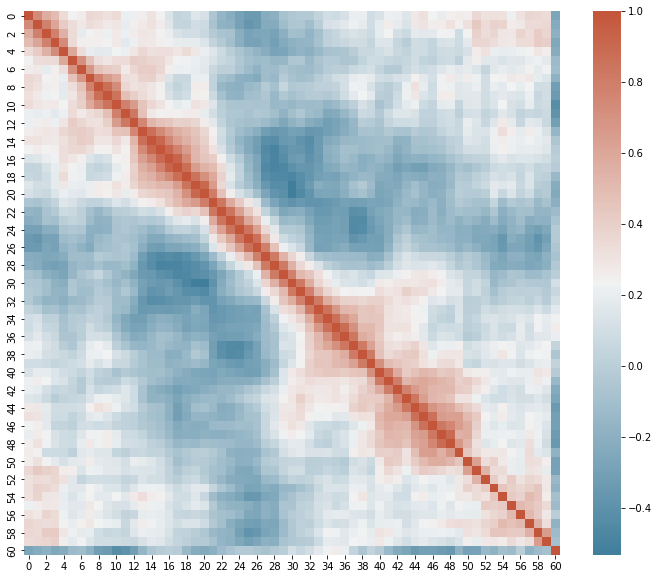

In [8]:
f, ax = plt.subplots(figsize=(12, 10)) 
cmap = sns.diverging_palette(230, 20, as_cmap=True) 
sns.heatmap(conv, annot=None ,cmap=cmap)

*correlation coefficients density graph*

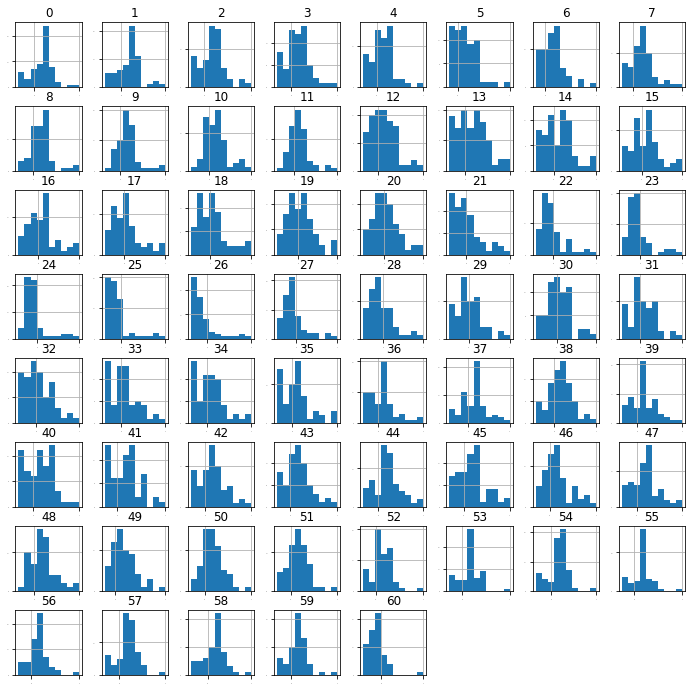

In [9]:
conv.hist(sharex=False, sharey=False, xlabelsize=1, ylabelsize=1, figsize=(12,12))
plt.show()

*getting max correlation coefficients*

In [10]:
df = pd.DataFrame(data)
c = df.corr().abs()
s = c.unstack()
y_corr = s[60]
del y_corr[60]
y_corr
print(max(y_corr))

0.4328549236892343


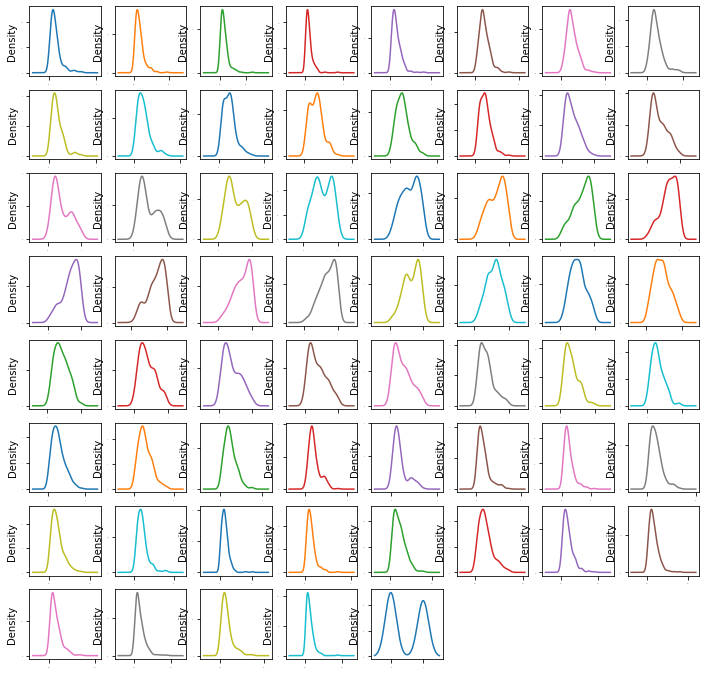

In [11]:
data.plot(kind='density', subplots=True, layout=(8,8), sharex=False, legend=False, fontsize=1, figsize=(12,12))
plt.show()

*split data to tain and test*

In [12]:
''' split the data'''
X = data.drop(60 ,1)
y = data[60]
X_train,X_test,y_train,y_test = train_test_split(X ,y ,test_size = 0.1, random_state=1)

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:2: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  


**Find out Best Machine Learning Algorithm**

/opt/conda/lib/python3.7/site-packages/sklearn/utils/validation.py:70: FutureWarning: Pass priors=0.0001 as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


1.0
0.8095238095238095
AxesSubplot(0.125,0.125;0.62x0.755)


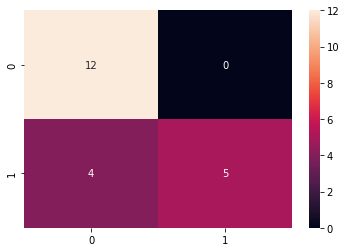

In [13]:
'''QDA_model'''
model_QDA = QuadraticDiscriminantAnalysis(0.0001)
model_QDA.fit(X_train, y_train)
        
y_train_pred = model_QDA.predict(X_train)
train_accurcy = accuracy_score(y_train_pred,y_train)
print(train_accurcy)
   
y_test_pred = model_QDA.predict(X_test)
test_accurcy = accuracy_score(y_test_pred,y_test)
print(test_accurcy)
                                   
con = confusion_matrix(y_test,y_test_pred)
hmap = sns.heatmap(con,annot=True,fmt="d")
print(hmap)


0.8556149732620321
0.7142857142857143
AxesSubplot(0.125,0.125;0.62x0.755)


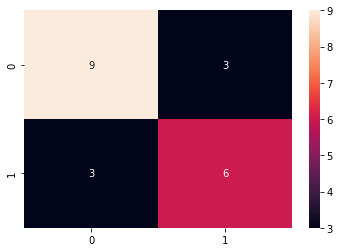

In [14]:
'''Logistic_Regression_model'''
logistic_model = LogisticRegression(penalty='l2',solver='lbfgs',C=1.0,random_state=1)
logistic_model.fit(X_train, y_train)
        
y_train_pred = logistic_model.predict(X_train)
train_accurcy = accuracy_score(y_train_pred,y_train)
print(train_accurcy)

y_test_pred = logistic_model.predict(X_test)
test_accurcy = accuracy_score(y_test_pred,y_test)
print(test_accurcy)
    
con = confusion_matrix(y_test,y_test_pred)
hmap =sns.heatmap(con,annot=True,fmt="d")
print(hmap)

0.8983957219251337
0.8095238095238095
AxesSubplot(0.125,0.125;0.62x0.755)


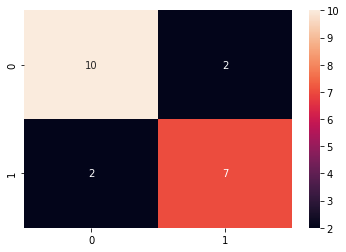

In [15]:
''''SVC_model'''
SVC_model = SVC()
SVC_model.fit(X_train, y_train)

y_train_pred = SVC_model.predict(X_train)
train_accurcy = accuracy_score(y_train_pred,y_train)
print(train_accurcy)
    
y_test_pred = SVC_model.predict(X_test)
test_accurcy = accuracy_score(y_test_pred,y_test)
print(test_accurcy)
        
con = confusion_matrix(y_test,y_test_pred)
hmap =sns.heatmap(con,annot=True,fmt="d")
print(hmap)

1.0
0.8571428571428571
AxesSubplot(0.125,0.125;0.62x0.755)


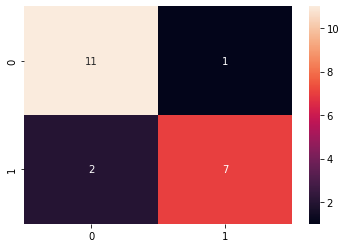

In [16]:
'''Random_Forest_model'''
forest_model = RandomForestClassifier(n_estimators = 50,max_depth=5)
forest_model.fit(X_train, y_train)

y_train_pred = forest_model.predict(X_train)
train_accurcy = accuracy_score(y_train_pred,y_train)
print(train_accurcy)

y_test_pred = forest_model.predict(X_test)
test_accurcy = accuracy_score(y_test_pred,y_test)
print(test_accurcy)
    
con = confusion_matrix(y_test,y_test_pred)
hmap =sns.heatmap(con,annot=True,fmt="d")
print(hmap)